In [1]:
!pip install --user nolearn

In [2]:
import warnings
warnings.filterwarnings("ignore") #suppress warnings
from sklearn.cross_validation import train_test_split
from sklearn.metrics import classification_report
from sklearn import datasets
from nolearn.dbn import DBN
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

gnumpy: failed to import cudamat. Using npmat instead. No GPU will be used.


/gpfs/fs01/user/s8c1-4470ac8ed28a34-aaf22a5b05f7/.local/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/")

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [4]:
mnist_images = mnist.train.images
mnist_labels = mnist.train.labels

In [5]:
trX, teX, trY, teY = train_test_split(mnist_images, mnist_labels.astype("int0"), test_size = 0.33)
print "Number of images for training:", trX.shape[0]
print "Number of images used for testing:", trY.shape[0]
pix = int(np.sqrt(teX.shape[1]))
print "Each image is:", pix, "by", pix, "pixels"

Number of images for training: 36850
Number of images used for testing: 36850
Each image is: 28 by 28 pixels


In [6]:
dbn = DBN(
    [trX.shape[1], 300, 10], 
    learn_rates = 0.3,
    learn_rate_decays = 0.9,
    epochs = 10, 
    verbose = 1) # set verbose to 0 for not printing output
dbn.fit(trX, trY)

[DBN] fitting X.shape=(36850, 784)
[DBN] layers [784, 300, 10]
[DBN] Fine-tune...


100%


Epoch 1:
  loss 0.306180414088
  err  0.0910597826087
  (0:00:06)


100%


Epoch 2:
  loss 0.172203536744
  err  0.0489673913043
  (0:00:06)


100%


Epoch 3:
  loss 0.132379718259
  err  0.0383967391304
  (0:00:06)


100%


Epoch 4:
  loss 0.0891147371139
  err  0.0271195652174
  (0:00:06)


100%


Epoch 5:
  loss 0.0673128366353
  err  0.0204891304348
  (0:00:06)


100%


Epoch 6:
  loss 0.0507170499472
  err  0.0158152173913
  (0:00:06)


100%


Epoch 7:
  loss 0.0338105275618
  err  0.0108423913043
  (0:00:06)


100%


Epoch 8:
  loss 0.0259513343995
  err  0.00826086956522
  (0:00:06)


100%


Epoch 9:
  loss 0.0200894776643
  err  0.00611413043478
  (0:00:06)


100%


Epoch 10:
  loss 0.0143680152744
  err  0.00391304347826
  (0:00:06)


In [7]:
preds = dbn.predict(teX)
print classification_report(teY, preds)

             precision    recall  f1-score   support

          0       0.99      0.98      0.99      1824
          1       0.99      0.99      0.99      2084
          2       0.98      0.97      0.97      1760
          3       0.97      0.97      0.97      1861
          4       0.98      0.98      0.98      1706
          5       0.97      0.97      0.97      1637
          6       0.99      0.99      0.99      1787
          7       0.97      0.98      0.98      1942
          8       0.97      0.97      0.97      1763
          9       0.97      0.97      0.97      1786

avg / total       0.98      0.98      0.98     18150



In [8]:
##function to return random image and predict its class

def randIm():
    i = np.random.choice(np.arange(0, len(teY)), size = (1,))
    pred = dbn.predict(np.atleast_2d(teX[i]))
    image = (teX[i] * 255).reshape((28, 28)).astype("uint8")
    # show the prediction
    print "Actual digit is", teY[i][0], "predicted", pred[0]
    imgplot = plt.imshow(image)
    imgplot.set_cmap('gray')   

Actual digit is 8 predicted 8


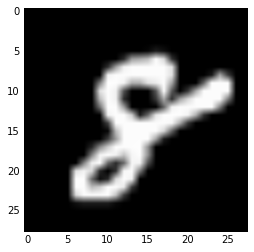

In [18]:
randIm() #run this cell multiple times to get random images and predicted outputs